# Introduction
text

In [5]:
#Annoying folder stuff
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
# Import plotting and numpy
#import math as m
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np

# Import vortex panel and boundary layer functions
from vortexpanel import VortexPanel as vp
from vortexpanel import BoundaryLayer as bl

# Generation of a 2D cambered foil
A 4 digit equation driven NACA foil was as the foil for unvestigation. This was done due to the ease of varying the foils properties. The shape of the foil is described as follows, 
* The first digit is divided by 100 to obtain the maximum camber m as a percentage of the chord ___m___
* The second digit is divided by 10 to obtain the location of the maximum camber ___p___
* The final 2 digits are divided by 100 to obtain the foils thickness as a percentage of the chord ___t___

This allowed a series of foils with a with a camber in the range $0\le m/c\le 10\%$ to be generated. To facilitate the compararion of these foils, a chord of 1 and a $t/c=0.15$ was used.

The x and y co-ordinates of the foil are calculated for $N$ points.

The neccessary value for $N$ is determined by measuring the distance around the foil, and solving for $\gamma$.


In [19]:
#https://en.wikipedia.org/wiki/NACA_airfoil#Equation_for_a_cambered_4-digit_NACA_airfoil
t = 0.15; c = 1; p = 0.3;

def camber_line( x, m, p, c ):
    return np.where((x>=0)&(x<=(c*p)),
                    m * (x / np.power(p,2)) * (1 / c) * (2.0 * p - (x / c)),
                    m * ((c - x) / np.power(1-p,2)) * (1.0 + (x / c) - 2.0 * p ))

def dyc_over_dx( x, m, p, c ):
    return np.where((x>=0)&(x<=(c*p)),
                    ((2.0 * m) / np.power(p,2)) * (p - (x / c)),
                    ((2.0 * m ) / np.power(1-p,2)) * (p - (x / c )))

def thickness( x, t, c ):
    term1 =  0.2969 * (np.sqrt(x/c))
    term2 = -0.1260 * (x/c)
    term3 = -0.3516 * np.power(x/c,2)
    term4 =  0.2843 * np.power(x/c,3)
    term5 = -0.1015 * np.power(x/c,4)
    return 5 * t * c * (term1 + term2 + term3 + term4 + term5)

#max camber, location of max camber, thickness, chord 

def naca4(N, m, p, t, c):
    x = np. linspace(0, c, N)
    dyc_dx = dyc_over_dx(x, m, p, c)
    th = np.arctan(dyc_dx)
    yt = thickness(x, t, c)
    yc = camber_line(x, m, p, c)
    x_top, y_top = (x - yt*np.sin(th), yc + yt*np.cos(th))
    x_bot, y_bot = (x + yt*np.sin(th), yc - yt*np.cos(th))
    xbot = np.flip(x_bot)
    ybot = np.flip(y_bot)
    xcoord = np.concatenate([xbot[:-1], x_top])
    ycoord = np.concatenate([ybot[:-1], y_top])
    return xcoord, ycoord


# Obtaining the Panel Array and Solving for flow around the foil
This section of code takes the x and y array for the foil and returns a panel array of the foil coordinates. Following this, the flow is solved for $\gamma$ when the foil is at angle $\alpha$ to the flow.

In [27]:
#solve for pannels
def make_naca4(N, m):
    x, y = naca4(N, m, p, t, c)
    panels = vp.panelize(x, y)
    return panels

def plot_naca4(N, m, alpha):
    plot = make_naca4(N, m)
    plot.solve_gamma(alpha , kutta = [(0,-1)]) 
    plot.plot_flow()
      
    plt.xlim(-0.05, 1.05);
    plt.ylim(-0.5, 1.05);


# Obtaining Results
Once the NACA foil is fully defined, the function is called to generate the panel array across a range of $m$ values. This is used for further analysis __check with Rhys what else needs to go in here__


In [32]:
#making various cambers

N = 128
alpha = 0.05

for i in range(10):
    m = 0.01 + (i/100)
    panels = make_naca4(N, m) 
    cam = round (m, 3)
    print(cam, panels)

0.01 <vortexpanel.VortexPanel.PanelArray object at 0x0000017101779D48>
0.02 <vortexpanel.VortexPanel.PanelArray object at 0x000001717BE75848>
0.03 <vortexpanel.VortexPanel.PanelArray object at 0x000001717BE75948>
0.04 <vortexpanel.VortexPanel.PanelArray object at 0x000001717BE75748>
0.05 <vortexpanel.VortexPanel.PanelArray object at 0x000001717BE75A08>
0.06 <vortexpanel.VortexPanel.PanelArray object at 0x000001717BE75A88>
0.07 <vortexpanel.VortexPanel.PanelArray object at 0x000001717BE75B08>
0.08 <vortexpanel.VortexPanel.PanelArray object at 0x000001717BE75B88>
0.09 <vortexpanel.VortexPanel.PanelArray object at 0x000001717BE75C08>
0.1 <vortexpanel.VortexPanel.PanelArray object at 0x000001717BE75C88>


0.01
0.02
0.03
0.04
0.05
0.06
0.07
0.08
0.09
0.1


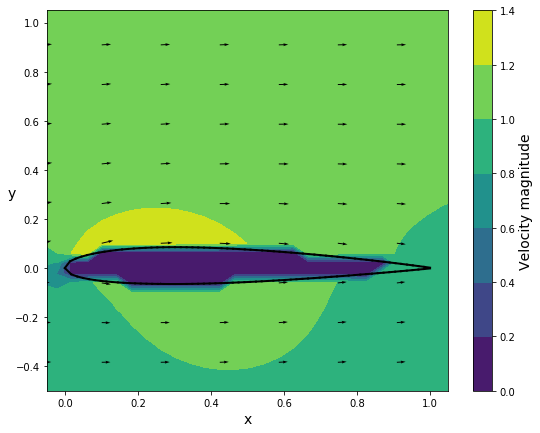

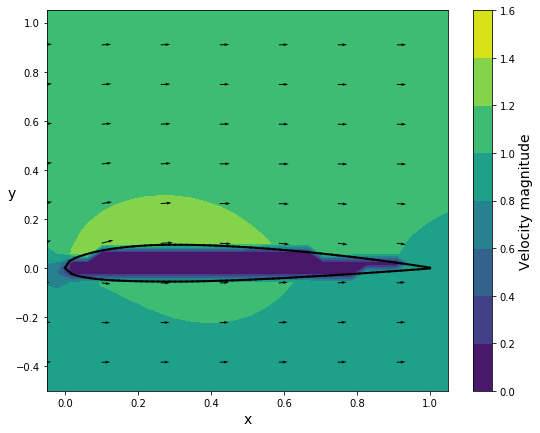

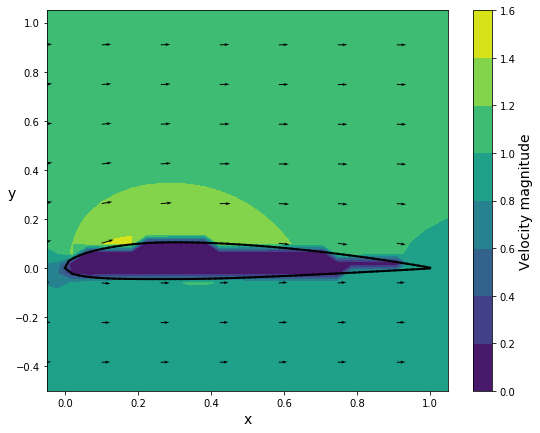

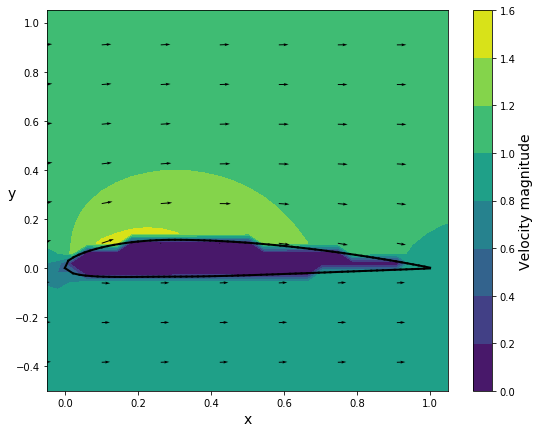

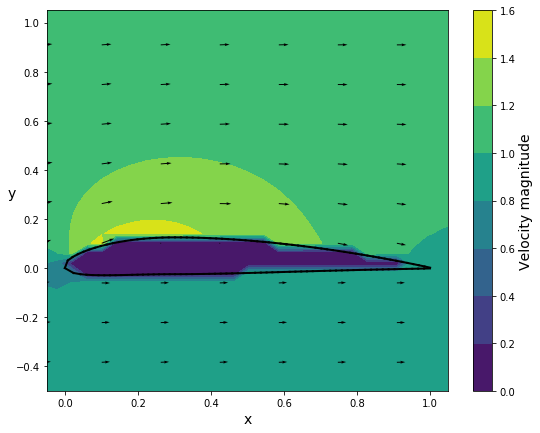

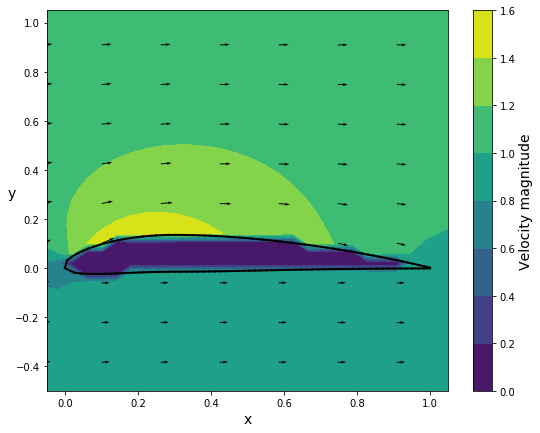

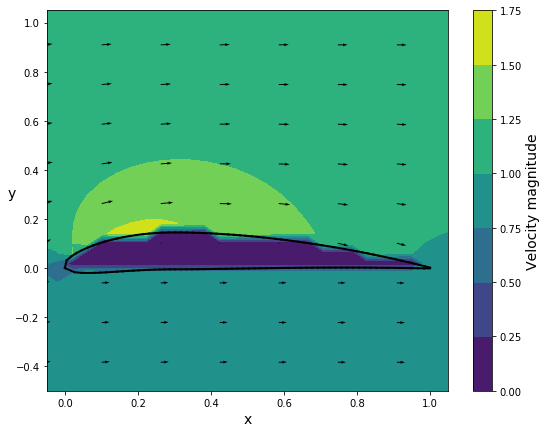

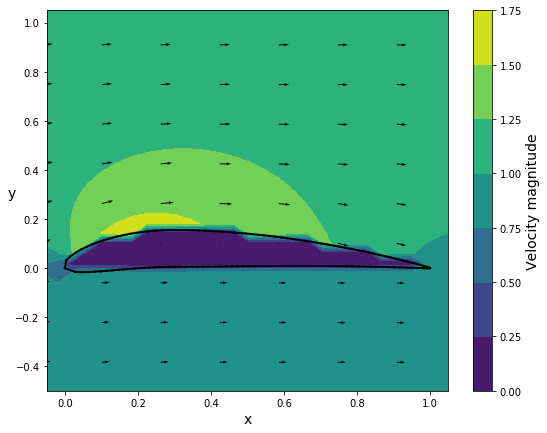

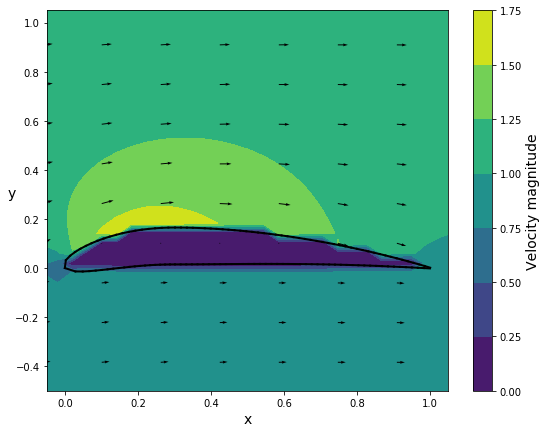

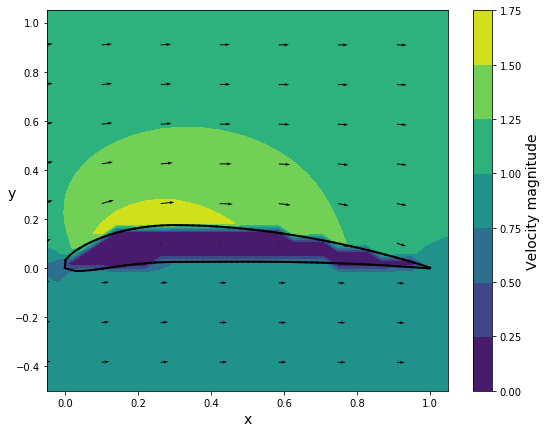

In [21]:
#plotting various cambers

N = 128
alpha = 0.05

for i in range(10):
    m = 0.01 + (i/100)
    plot_naca4(N, m, alpha) 
    cam = round (m, 3)
    print(cam)
    

0.0
1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0


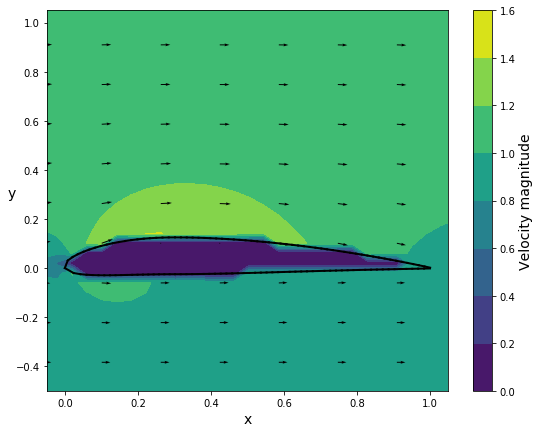

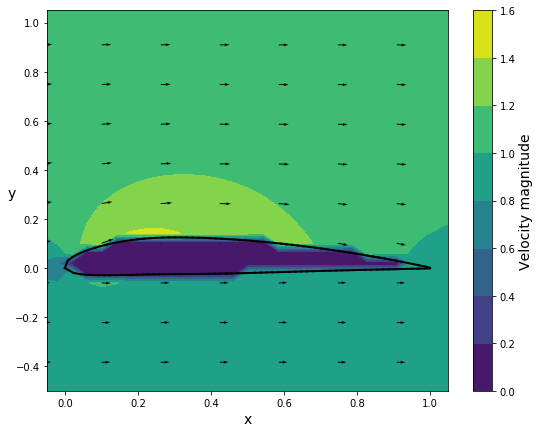

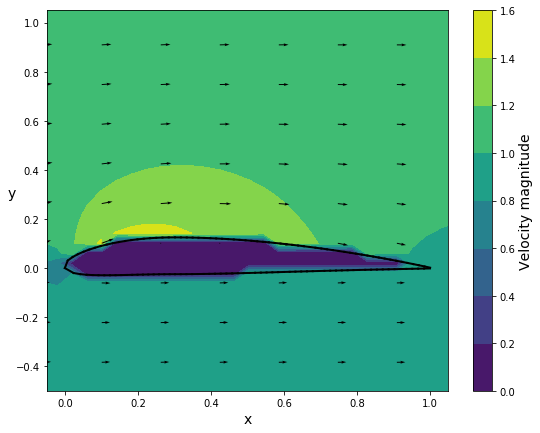

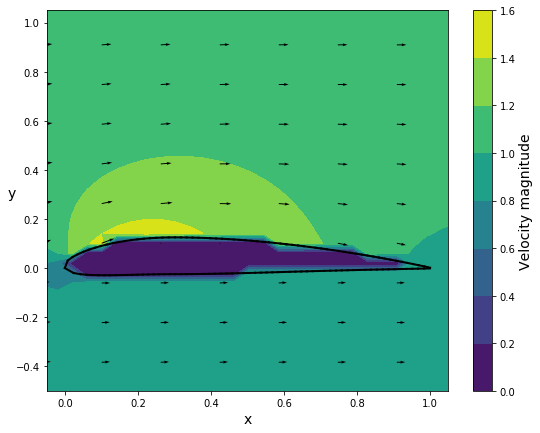

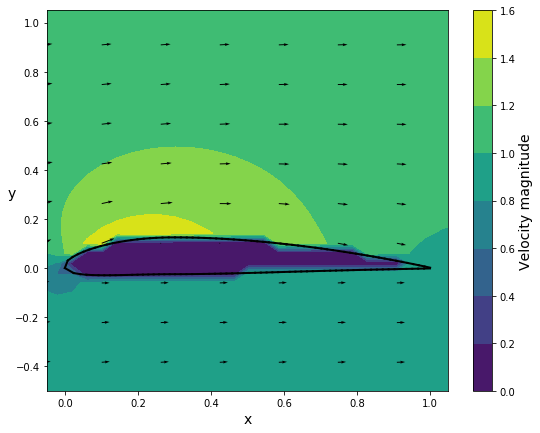

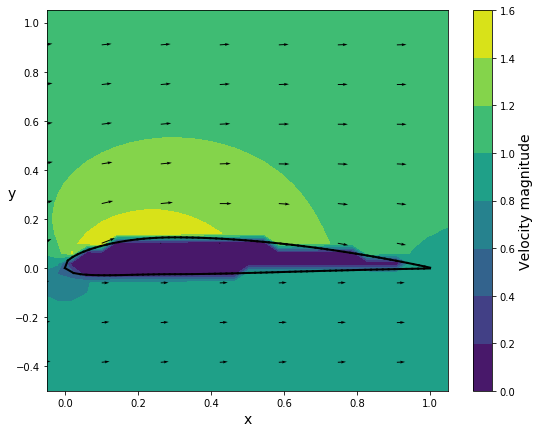

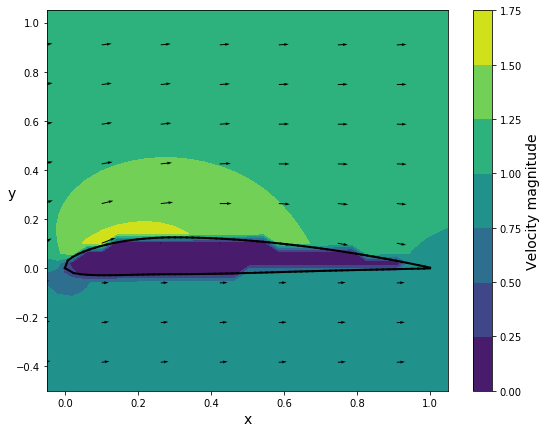

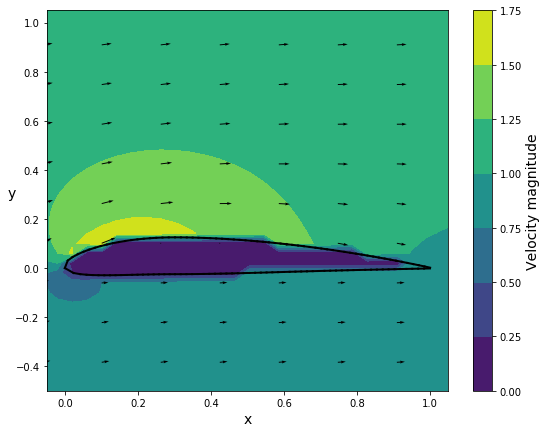

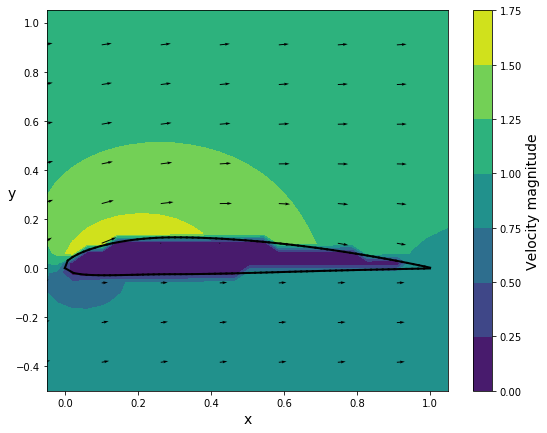

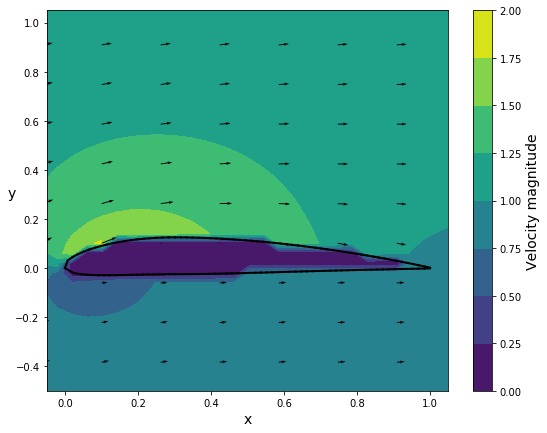

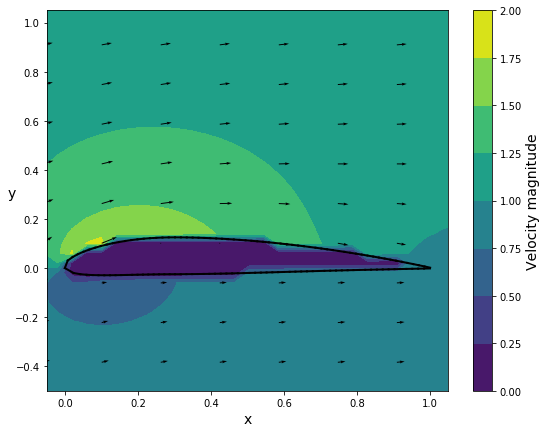

In [22]:
#vary alpha
N = 64
m = 0.05

for i in range(11):
    rad_alpha = (np.pi*i/180)
    plot_naca4(N, m, rad_alpha) 
    degree_alpha = 180*rad_alpha/np.pi
    print(degree_alpha)

# Validation of Convergence 

To validate the convergence, the distance around the foil is measured using the distance function imported from VortexPanel. The code solves for $\gamma$ for $N = 2^n$ when n is between 2 and 9. Figure __x__ shows that the system converges when N is equal to 128.

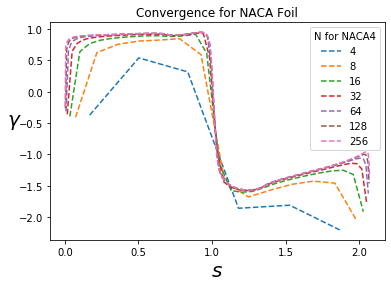

In [40]:
#validating Convergence of the system

# Loop over resolutions
for N in 2**np.arange(2,9,1):         # N in powers of 2
    naca = make_naca4(N, m=0.05)         # define geometry abitary value of m used
    s = naca.distance()              # get distance array
    
    naca.solve_gamma(alpha = 0.05, kutta = [(0, 1)])    # solve for gamma, abitary value of alpha used
    gamma = naca.get_array('gamma')   # get gamma array
    plt.plot(s,gamma,'--',label=N)      # plot

# plot to determine convergence
plt.legend(title='N for NACA4')
plt.xlabel(r'$s$', fontsize=20)
plt.ylabel(r'$\gamma$', fontsize=20, rotation=0)
plt.title('Convergence for NACA Foil')
plt.show()

#convergence around 64/128

# Verification of Kutta Condition application

To further verify the model used, the first and last value of $\gamma$ is compared. When $\gamma[0] = -\gamma[-1]$, the kutta conditon has been correctly applied. This occurs when $N=256$ when compared at 3 significant figures, however it occurs at 64 for 2 significnat figures. From this, it can be conclused that the kutta condition has been correctly applied to the system.

In [70]:
#verifying Kutta condition is applied

for N in 2**np.arange(3,10,1):
    naca = make_naca4(N, m=0.05)
    naca.solve_gamma(alpha=0.05, kutta = [(0, -1)])
    gamma = naca.get_array('gamma')
    g0 = gamma[0]
    g1 = -gamma[-1]
    print(N, round(g0, 3), round(g1, 3))

8 0.942 0.933
16 0.904 0.899
32 0.879 0.876
64 0.87 0.868
128 0.884 0.883
256 0.921 0.921
512 0.963 0.962
